# 1. Gathering data

## 1.1 compiling data into a single file

In [2]:
# importing required libraries
import pandas as pd 
import os
import seaborn as sn
import datetime as dt
import darts as ds
from darts.utils import model_selection
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the directory where the Excel files are located
directory = "D:\\G_RAJESH\\UOH_MBA\\projects2.0\\elec_data\\"


In [4]:
# Initialize an empty list to store the dataframes
dataframes = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Reading the csv file
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Extract the month and year from the filename
        period = filename.split('_')[4]
        # removing .csv
        period = period.split('.')[0]
        # Add a new column with the month
        df['Period'] = period
        
        # Append the dataframe to the list
        dataframes.append(df)
# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes)

In [15]:
# checking collated df
combined_df

,Circle,Division,SubDivision,Section,Area,CatCode,CatDesc,TotServices,BilledServices,Units,Load,Period
0,PEDDAPALLY,PEDDAPALLY,DHARMARAM,JULAPALLY,KUMMARIKUNTA (REC),2,COMMERCIAL,46,44,5242.0,58.016,MAY-2024
1,PEDDAPALLY,PEDDAPALLY,DHARMARAM,JULAPALLY,NAGULA PALLY,2,COMMERCIAL,18,17,778.0,21.320,MAY-2024
2,PEDDAPALLY,PEDDAPALLY,SULTHANABAD,KANKULA,RAGADIMADDI KUNTA,2,COMMERCIAL,37,36,9859.0,93.550,MAY-2024
3,PEDDAPALLY,PEDDAPALLY,SULTHANABAD,KANKULA,RAMUNIPALLEY,2,COMMERCIAL,4,4,390.0,4.260,MAY-2024
4,PEDDAPALLY,PEDDAPALLY,SULTHANABAD,KANKULA,REBALDEVAPALLY,2,COMMERCIAL,3,3,690.0,8.000,MAY-2024
...,...,...,...,...,...,...,...,...,...,...,...,...
8037,HANUMAKONDA,HANAMKONDA/RURAL,PARKAL,ATMAKUR,PEDHAPUR,2,COMMERCIAL,59,45,10912.0,108.540,SEPTEMBER-2023
8038,HANUMAKONDA,HANAMKONDA/RURAL,PARKAL,ATMAKUR,PENCHIKALAPET,2,COMMERCIAL,50,34,6229.0,53.300,SEPTEMBER-2023
8039,HANUMAKONDA,HANAMKONDA/RURAL,PARKAL,ATMAKUR,THIRUMALAGIRI,2,COMMERCIAL,9,8,1093.0,25.000,SEPTEMBER-2023
8040,HANUMAKONDA,HANAMKONDA/RURAL,PARKAL,DAMERA,DAMARA,2,COMMERCIAL,112,105,34146.0,356.611,SEPTEMBER-2023


In [190]:
combined_df[['Circle','Division']].value_counts()

Circle                Division         
BHADRADRI KOTHAGUDEM  KOTHAGUDEM           28966
ADILABAD              ADILABAD             22335
MANCHERIAL            MANCHERIAL           19661
MAHABUBABAD           MAHABUBABAD          18419
JAGITYAL              JAGITYAL             17424
BHUPALAPALLY          BHUPALAPALLY         16620
NIRMAL                NIRMAL               15621
KHAMMAM               KHAMMAM              15399
BHUPALAPALLY          MULUGU               15037
HANUMAKONDA           HANAMKONDA/RURAL     14980
BHADRADRI KOTHAGUDEM  BHADRACHALAM         14887
NIZAMABAD             NIZAMABAD            14636
ASIFABAD              ASIFABAD             14282
KAMAREDDY             BANSWADA             13398
KHAMMAM               SATHUPALLY           12927
ASIFABAD              SIRPUR KAGAZNAGAR    12874
KHAMMAM               KHAMMAM RURAL        12568
NIRMAL                BHAINSA              12477
WARANGAL              NARSAMPET            12144
PEDDAPALLY            PEDDAPA

In [187]:
combined_df.groupby(['Circle']).count()

,Division,SubDivision,Section,Area,CatCode,CatDesc,TotServices,BilledServices,Units,Load,Period
Circle,,,,,,,,,,,
ADILABAD,32810,32810,32810,32810,32810,32810,32810,32810,32810,32810,32810
ASIFABAD,27156,27156,27156,27156,27156,27156,27156,27156,27156,27156,27156
BHADRADRI KOTHAGUDEM,43853,43853,43853,43853,43853,43853,43853,43853,43853,43853,43853
BHUPALAPALLY,31657,31657,31657,31657,31657,31657,31657,31657,31657,31657,31657
HANUMAKONDA,23697,23697,23697,23697,23697,23697,23697,23697,23697,23697,23697
JAGITYAL,25393,25393,25393,25393,25393,25393,25393,25393,25393,25393,25393
JANGAON,18429,18429,18429,18429,18429,18429,18429,18429,18429,18429,18429
KAMAREDDY,31956,31956,31956,31956,31956,31956,31956,31956,31956,31956,31956
KARIMNAGAR,25908,25908,25908,25908,25908,25908,25908,25908,25908,25908,25908


## 1.2 Separating usefull columns

In [16]:
# separating usefull columns
raw_data = combined_df[['Period','Circle','Units' ]]
raw_data

,Period,Circle,Units
0,MAY-2024,PEDDAPALLY,5242.0
1,MAY-2024,PEDDAPALLY,778.0
2,MAY-2024,PEDDAPALLY,9859.0
3,MAY-2024,PEDDAPALLY,390.0
4,MAY-2024,PEDDAPALLY,690.0
...,...,...,...
8037,SEPTEMBER-2023,HANUMAKONDA,10912.0
8038,SEPTEMBER-2023,HANUMAKONDA,6229.0
8039,SEPTEMBER-2023,HANUMAKONDA,1093.0
8040,SEPTEMBER-2023,HANUMAKONDA,34146.0


In [17]:
# checking data types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480041 entries, 0 to 8041
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Period  480041 non-null  object 
 1   Circle  480041 non-null  object 
 2   Units   480041 non-null  float64
dtypes: float64(1), object(2)
memory usage: 14.6+ MB


In [18]:
# converting Month to datetime format
raw_data['Period'] = pd.to_datetime(raw_data.Period,format = "mixed") ##format is not working, solve later
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480041 entries, 0 to 8041
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Period  480041 non-null  datetime64[ns]
 1   Circle  480041 non-null  object        
 2   Units   480041 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 14.6+ MB


C:\Users\G RAJESH\AppData\Local\Temp\ipykernel_9260\1920117530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Period'] = pd.to_datetime(raw_data.Period,format = "mixed") ##format is not working, solve later


In [19]:
raw_data

,Period,Circle,Units
0,2024-05-01,PEDDAPALLY,5242.0
1,2024-05-01,PEDDAPALLY,778.0
2,2024-05-01,PEDDAPALLY,9859.0
3,2024-05-01,PEDDAPALLY,390.0
4,2024-05-01,PEDDAPALLY,690.0
...,...,...,...
8037,2023-09-01,HANUMAKONDA,10912.0
8038,2023-09-01,HANUMAKONDA,6229.0
8039,2023-09-01,HANUMAKONDA,1093.0
8040,2023-09-01,HANUMAKONDA,34146.0


In [10]:
# raw_data.to_excel("D:\\G_RAJESH\\UOH_MBA\\projects2.0\\elec_data\\rawdata1.0.xlsx")

# 2 Data preparation

## 2.1 making data stremlined

In [20]:
# setting Month as index
raw_data.set_index('Period',
                    inplace=True)
raw_data

,Circle,Units
Period,,
2024-05-01,PEDDAPALLY,5242.0
2024-05-01,PEDDAPALLY,778.0
2024-05-01,PEDDAPALLY,9859.0
2024-05-01,PEDDAPALLY,390.0
2024-05-01,PEDDAPALLY,690.0
...,...,...
2023-09-01,HANUMAKONDA,10912.0
2023-09-01,HANUMAKONDA,6229.0
2023-09-01,HANUMAKONDA,1093.0


In [21]:
# grouping at circle level for every month
raw_data.groupby(['Period','Circle']).mean()

Units
Period     Circle                            
2019-01-01 ADILABAD               4330.904306
           ASIFABAD               2566.532934
           BHADRADRI KOTHAGUDEM   5781.569204
           BHUPALAPALLY           3046.318735
           HANUMAKONDA           14910.470930
...                                       ...
2024-05-01 MANCHERIAL            11726.191753
           NIRMAL                 8180.058824
           NIZAMABAD             19138.028053
           PEDDAPALLY            14380.357143
           WARANGAL              13350.978723

[1040 rows x 1 columns]

In [22]:
# grouping at TNSPDCL level and storing a dataframe
data_at_top = pd.DataFrame(raw_data.groupby(['Period'])['Units'].mean())

In [23]:
data_at_top

,Units
Period,
2019-01-01,7455.183814
2019-02-01,7515.561386
2019-03-01,8422.771608
2019-04-01,10404.970395
2019-05-01,11425.451342
...,...
2024-01-01,8285.465486
2024-02-01,8974.451452
2024-03-01,9350.772379


In [191]:
# exporting raw data
# data_at_top.to_excel('prep_data_final.xlsx')

## Data exploration

In [24]:
# looking for null values
data_at_top.isnull().sum()

Units    0
dtype: int64

In [25]:
# choosing mean over sum as mean is more appropriate measure of central tendency
data_at_top.columns

Index(['Units'], dtype='object')

* no null values invloved

* train/test split ratio = 80:20

## Visualization


<Axes: xlabel='Period', ylabel='Units'>

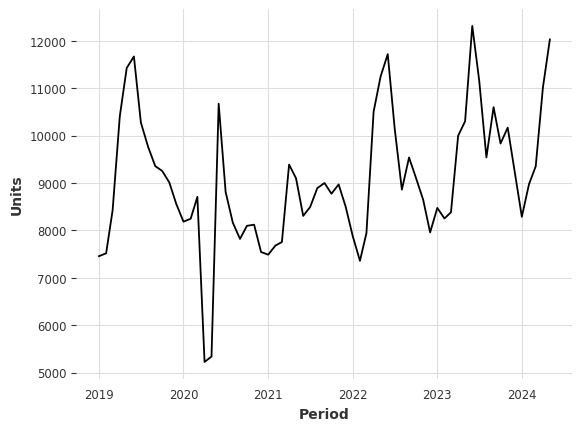

In [26]:
sn.lineplot(data=data_at_top,
                x='Period',
                y='Units')

* This series has additive nature not multiplicative

In [27]:
# creating separate dataframe for visualization
viz_data_at_top = data_at_top.copy()
# Extract month and year from date
viz_data_at_top['month'] = viz_data_at_top.index.month
viz_data_at_top['year'] = viz_data_at_top.index.year

In [28]:
viz_data_at_top

,Units,month,year
Period,,,
2019-01-01,7455.183814,1,2019
2019-02-01,7515.561386,2,2019
2019-03-01,8422.771608,3,2019
2019-04-01,10404.970395,4,2019
2019-05-01,11425.451342,5,2019
...,...,...,...
2024-01-01,8285.465486,1,2024
2024-02-01,8974.451452,2,2024
2024-03-01,9350.772379,3,2024


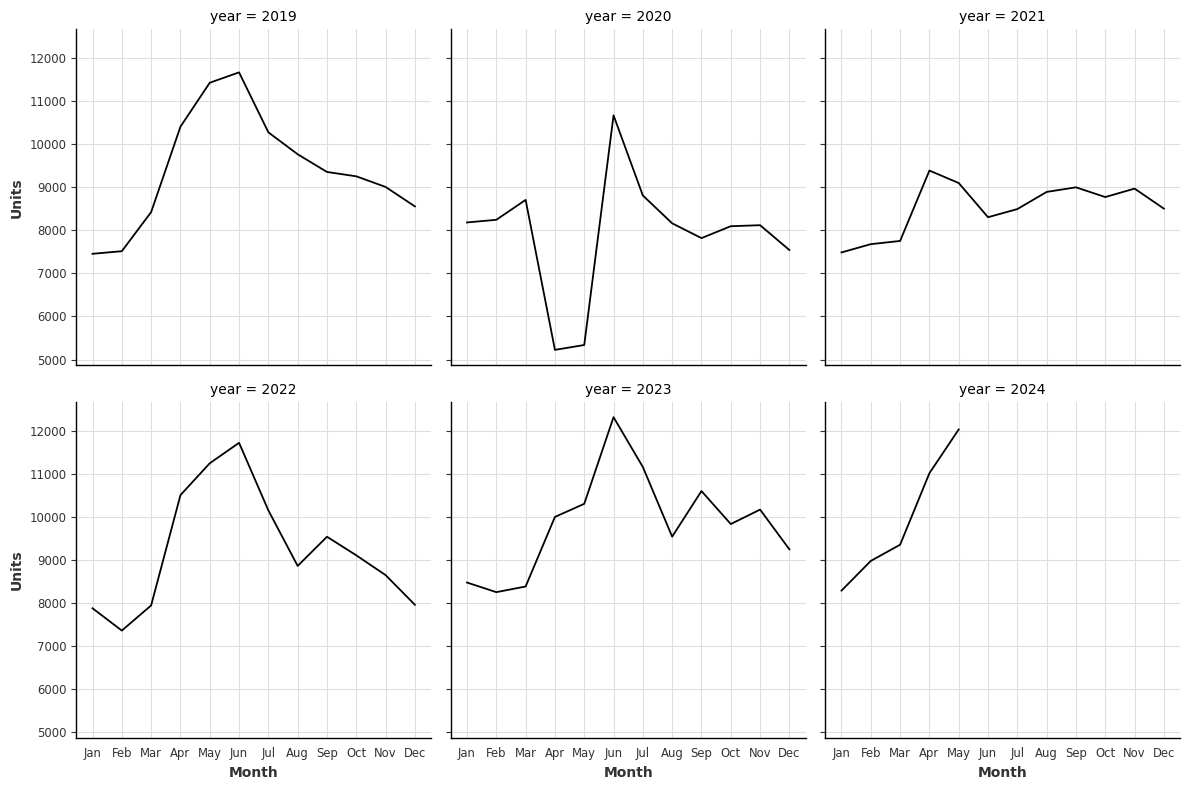

In [29]:
# Create a grid of subplots for each year
g = sn.FacetGrid(viz_data_at_top, col="year", col_wrap=3, height=4)
# Draw lineplot for each year
g = g.map(sn.lineplot, "month", "Units")
# Set x-axis labels
g.set_axis_labels('Month', 'Units')
# Set x ticks as month names
g.set(xticks=range(1, 13), xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Show the plot
plt.show()

* 1 for years 2019, 2020, 2022, 2023 maximum demand is obeserved in June month, except for year 2021 why? <br/>
* 2 for year 2021, why maximum demand is seen in April month?
* 3 for years 2019, 2021, 2022, 2023 minimum demand is observed in January/Febraury month. But for year 2020 minimum demand is observed in April month.Why?


* there is cyclicity

# 2. Building model

## 2.1 Building model at TGSNSPDCL  level

* Using Darts library for Timesereis analysis

### Time series statistics

* checking for seasonality

In [33]:
# importin static function
from darts.utils.statistics import check_seasonality, extract_trend_and_seasonality, plot_acf,plot_hist, stationarity_test_adf, plot_pacf, stationarity_test_kpss, stationarity_tests

# 
from darts.timeseries import TimeSeries as Ts

In [34]:
# creating darts timeseries object
data_at_top_ds = Ts.from_dataframe(df=data_at_top)
data_at_top_ds

<TimeSeries (DataArray) (Period: 65, component: 1, sample: 1)> Size: 520B
array([[[ 7455.1838145 ]],

       [[ 7515.56138629]],

       [[ 8422.77160777]],

       [[10404.97039524]],

       [[11425.45134228]],

       [[11666.17809263]],

       [[10274.4016107 ]],

       [[ 9765.24943173]],

       [[ 9354.63938661]],

       [[ 9253.43826139]],

...

       [[ 9537.68813053]],

       [[10596.46431236]],

       [[ 9830.71612743]],

       [[10165.66860609]],

       [[ 9242.41302199]],

       [[ 8285.46548564]],

       [[ 8974.45145157]],

       [[ 9350.77237852]],

       [[11010.68386469]],

       [[12025.91997081]]])
Coordinates:
  * Period     (Period) datetime64[ns] 520B 2019-01-01 2019-02-01 ... 2024-05-01
  * component  (component) object 8B 'Units'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [35]:
check_seasonality(data_at_top_ds, alpha=0.01)

(True, 5)

* seasonality is confirmed

* do i has to build models without seasonality?

* is there need to remve seasonality?

In [36]:
trend, seasonality = extract_trend_and_seasonality(data_at_top_ds)

In [37]:
trend.pd_dataframe()

component,0
Period,
2019-01-01,10613.292291
2019-02-01,10447.868526
2019-03-01,10282.444761
2019-04-01,10117.020996
2019-05-01,9951.597231
...,...
2024-01-01,10231.384927
2024-02-01,10300.801141
2024-03-01,10370.217355


In [38]:
seasonality.pd_dataframe()

component,0
Period,
2019-01-01,0.864749
2019-02-01,0.869654
2019-03-01,0.915016
2019-04-01,1.010417
2019-05-01,1.058729
...,...
2024-01-01,0.864749
2024-02-01,0.869654
2024-03-01,0.915016


* what is the inference from above?

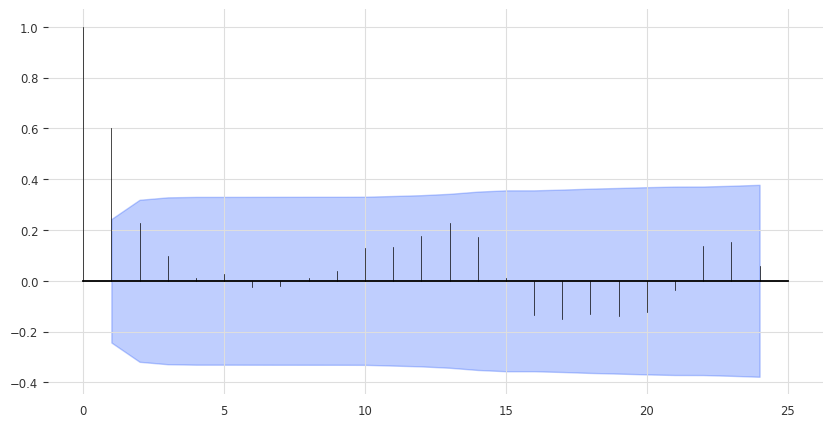

In [39]:
plot_acf(data_at_top_ds, alpha=0.05)

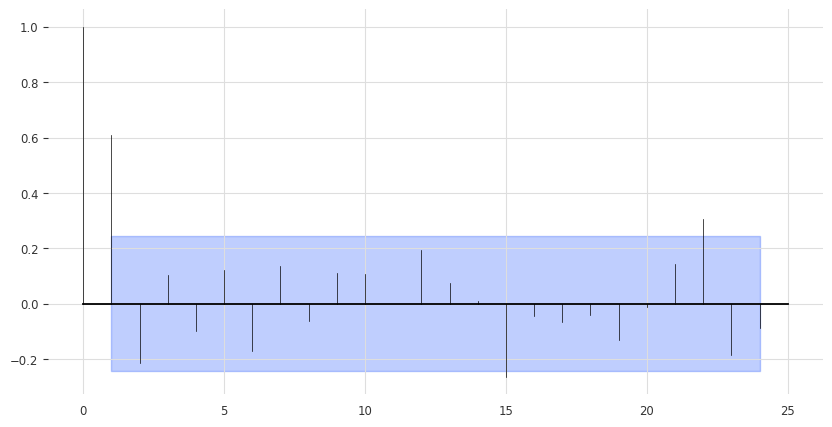

In [40]:
plot_pacf(data_at_top_ds, alpha=0.05)

p =2

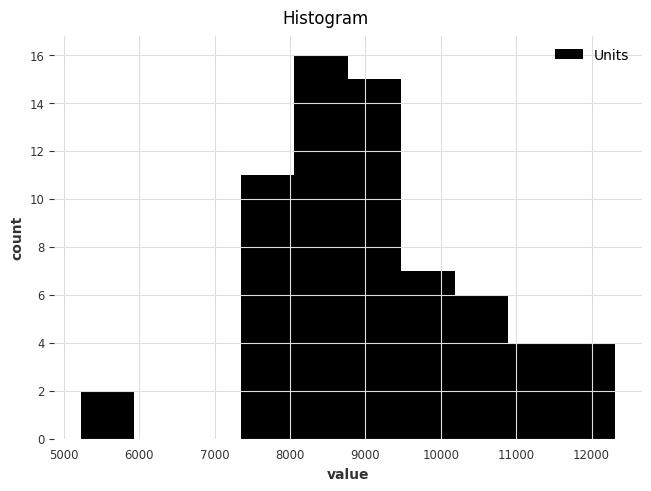

In [41]:
plot_hist(data_at_top_ds)

In [42]:
# checking stationarity through adf test
stationarity_test_adf(data_at_top_ds)


(-3.495034264683452,
 0.008115544265446582,
 0,
 64,
 {'1%': -3.53692771987915,
  '5%': -2.907887369384766,
  '10%': -2.591493291015625},
 899.936854486371)

* test statistic < critical values,
* p-value is < significance level
* we reject null hypothesis(h0: timeseries is non stationary)

In [43]:
# kpss test 
stationarity_test_kpss(data_at_top_ds)


(0.40351362782869626,
 0.07564067766004472,
 3,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [44]:
# yes no type stationarity test(adf and kpps combined) for stationarity
stationarity_tests(data_at_top_ds)

True

* stationarity is confirmed

* If timeseries couldnot have beeen stationary, it has to be transformed to stationary

###  train test split

In [45]:
# splitting data
train_data_top, test_data_top = model_selection.train_test_split(data = data_at_top_ds, test_size = 0.2)
# viewing train data
train_data_top

<TimeSeries (DataArray) (Period: 52, component: 1, sample: 1)> Size: 416B
array([[[ 7455.1838145 ]],

       [[ 7515.56138629]],

       [[ 8422.77160777]],

       [[10404.97039524]],

       [[11425.45134228]],

       [[11666.17809263]],

       [[10274.4016107 ]],

       [[ 9765.24943173]],

       [[ 9354.63938661]],

       [[ 9253.43826139]],

...

       [[10147.46845345]],

       [[ 8858.27362382]],

       [[ 9535.95947865]],

       [[ 9104.41525264]],

       [[ 8645.36914112]],

       [[ 7956.00677521]],

       [[ 8473.03277036]],

       [[ 8249.81136821]],

       [[ 8380.83804143]],

       [[ 9996.01203309]]])
Coordinates:
  * Period     (Period) datetime64[ns] 416B 2019-01-01 2019-02-01 ... 2023-04-01
  * component  (component) object 8B 'Units'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [46]:
# viewing test data
test_data_top

<TimeSeries (DataArray) (Period: 13, component: 1, sample: 1)> Size: 104B
array([[[10299.61540385]],

       [[12310.75381345]],

       [[11154.54015964]],

       [[ 9537.68813053]],

       [[10596.46431236]],

       [[ 9830.71612743]],

       [[10165.66860609]],

       [[ 9242.41302199]],

       [[ 8285.46548564]],

       [[ 8974.45145157]],

       [[ 9350.77237852]],

       [[11010.68386469]],

       [[12025.91997081]]])
Coordinates:
  * Period     (Period) datetime64[ns] 104B 2023-05-01 2023-06-01 ... 2024-05-01
  * component  (component) object 8B 'Units'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

## 2.1.1 Models

### 2.1.1.1 Moving average

In [47]:
#importing model
from darts import TimeSeries
from darts.models import filtering as flt

In [48]:
# Create a MovingAverage model
mv_avg_model = flt.moving_average_filter.MovingAverageFilter(window=12)

<Axes: xlabel='Period'>

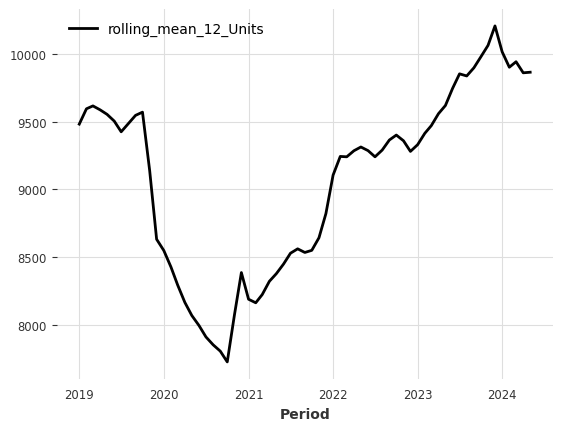

In [49]:
# Fit the model
mv_avg_model.filter(data_at_top_ds).plot()

* you cant use moving average model form darts for predicting


### 2.1.1.2 Simple Exponential smoothing model

In [50]:
# importin model and metrics
from darts.models import ExponentialSmoothing
from darts.utils.utils import ModelMode, SeasonalityMode
from darts.metrics import mae, mse, mape , rmse

In [51]:
# initializing model
sem_model = ExponentialSmoothing(trend= ModelMode.NONE ,
                                    seasonal=SeasonalityMode.NONE
                                    ,seasonal_periods=12)

In [52]:
# fitting sme model
sem_model.fit(train_data_top)

ExponentialSmoothing(trend=ModelMode.NONE, damped=False, seasonal=SeasonalityMode.NONE, seasonal_periods=12, random_state=0, kwargs=None)

In [53]:
# predicting
sem_prediction = sem_model.predict(len(test_data_top))

In [54]:
sem_prediction

<TimeSeries (DataArray) (Period: 13, component: 1, sample: 1)> Size: 104B
array([[[9828.11762586]],

       [[9828.11762586]],

       [[9828.11762586]],

       [[9828.11762586]],

       [[9828.11762586]],

       [[9828.11762586]],

       [[9828.11762586]],

       [[9828.11762586]],

       [[9828.11762586]],

       [[9828.11762586]],

       [[9828.11762586]],

       [[9828.11762586]],

       [[9828.11762586]]])
Coordinates:
  * Period     (Period) datetime64[ns] 104B 2023-05-01 2023-06-01 ... 2024-05-01
  * component  (component) object 8B 'Units'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

* same prediction for all months
* something is wrong with sem model

In [55]:
# evaluation metrics for sme_model

sme_metric = {
    'MAE': mae,
    'MAPE': mape,
    'MSE': mse,
    'RMSE': rmse
}

# storing results in a null dictiniary
sme_metric_results = {}

# using for loop for each metric
for metric_name, metric_function in sme_metric.items():
    sme_metric_results[metric_name] = metric_function(test_data_top, sem_prediction)

# converting dict to dataframe
sme_metrics = pd.DataFrame([sme_metric_results])

In [63]:
# inserting one more value for moder: for simpliciy later on....
sme_metrics['Model'] = "sem"
sme_metrics

,MAE,MAPE,MSE,RMSE,Model
0,963.016839,9.143631,1.449390e+06,1203.906164,sem


* SEM model is ruled out strightly

### 2.1.1.3 Holt-Winters’ Exponential Smoothing

* HW model is suitable when there is only trend and no seasonality
* in this case, we have seasonality so this is not applicabe?
* explore HW model as well

In [56]:
# initializing model
hwes_model = ExponentialSmoothing(trend= ModelMode.ADDITIVE ,
                                    seasonal=SeasonalityMode.ADDITIVE,
                                    seasonal_periods=12)

In [57]:
# fitting model
hwes_model.fit(train_data_top)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12, random_state=0, kwargs=None)

In [58]:
# predicting
hwes_prediction = hwes_model.predict(len(test_data_top))

In [60]:
hwes_prediction

<TimeSeries (DataArray) (Period: 13, component: 1, sample: 1)> Size: 104B
array([[[ 9906.29217177]],

       [[11306.53317207]],

       [[10253.18501686]],

       [[ 9847.18448853]],

       [[ 9887.53312232]],

       [[ 9824.29227129]],

       [[ 9761.82123256]],

       [[ 9231.64608881]],

       [[ 8892.39672644]],

       [[ 8803.71519189]],

       [[ 9155.34710706]],

       [[ 9902.19809458]],

       [[10131.7186624 ]]])
Coordinates:
  * Period     (Period) datetime64[ns] 104B 2023-05-01 2023-06-01 ... 2024-05-01
  * component  (component) object 8B 'Units'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [62]:
# evaluation metrics for hwes_model

hwes_metric = {
    'MAE': mae,
    'MAPE': mape,
    'MSE': mse,
    'RMSE': rmse
}

# storing results in a null dictiniary
hwes_metric_results = {}

# using for loop for each metric
for metric_name, metric_function in hwes_metric.items():
    hwes_metric_results[metric_name] = metric_function(test_data_top, hwes_prediction)

# converting dict to dataframe
hwes_metrics = pd.DataFrame([hwes_metric_results])

In [63]:
# inserting one more value for moder: for simpliciy later on....
hwes_metrics['Model'] = 'hwes'
hwes_metrics

,MAE,MAPE,MSE,RMSE,Model
0,593.395737,5.483265,614590.108773,783.957976,hwes


* this seems predicting perfectly

####  Holt-Winters’ Exponential Smoothing(multiplicate variant)

In [64]:
# initializing model
hwes_model_m = ExponentialSmoothing(trend= ModelMode.MULTIPLICATIVE ,
                                    seasonal=SeasonalityMode.MULTIPLICATIVE)

In [67]:
# fitting
hwes_model_m.fit(train_data_top)

d:\G_RAJESH\UOH_MBA\projects2.0\p2.0venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
d:\G_RAJESH\UOH_MBA\projects2.0\p2.0venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ExponentialSmoothing(trend=ModelMode.MULTIPLICATIVE, damped=False, seasonal=SeasonalityMode.MULTIPLICATIVE, seasonal_periods=None, random_state=0, kwargs=None)

In [69]:
# predicting
hwes_prediction_m = hwes_model_m.predict(len(test_data_top))
hwes_prediction_m

<TimeSeries (DataArray) (Period: 13, component: 1, sample: 1)> Size: 104B
array([[[10279.27995261]],

       [[11045.97773536]],

       [[ 9940.33905395]],

       [[ 9588.34526183]],

       [[ 9474.98431541]],

       [[ 9406.26209502]],

       [[ 9413.62720427]],

       [[ 8903.28990168]],

       [[ 8571.59492045]],

       [[ 8538.17403071]],

       [[ 9045.73350686]],

       [[ 9931.79343558]],

       [[10632.02078324]]])
Coordinates:
  * Period     (Period) datetime64[ns] 104B 2023-05-01 2023-06-01 ... 2024-05-01
  * component  (component) object 8B 'Units'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [70]:
# evaluation metrics for hwes_model

hwes_metric_m = {
    'MAE': mae,
    'MAPE': mape,
    'MSE': mse,
    'RMSE': rmse
}

# storing results in a null dictiniary
hwes_metric_m_results = {}

# using for loop for each metric
for metric_name, metric_function in hwes_metric.items():
    hwes_metric_m_results[metric_name] = metric_function(test_data_top, hwes_prediction_m)

# converting dict to dataframe
hwes_metrics_m = pd.DataFrame([hwes_metric_m_results])

In [71]:
# inserting one more value for moder: for simpliciy later on....
hwes_metrics_m['Model'] = 'hwes_m'
hwes_metrics_m

,MAE,MAPE,MSE,RMSE,Model
0,668.254128,6.217082,666737.550466,816.539987,hwes_m


* multiplicate variant seems to good one

#### Holt-Winters’ Exponential Smoothing (trend= additive, seasonality = multiplicative)

In [72]:
# initializing model
hwes_model_am = ExponentialSmoothing(trend= ModelMode.ADDITIVE ,
                                    seasonal=SeasonalityMode.MULTIPLICATIVE,
                                    seasonal_periods=12)

In [73]:
# fitting model
hwes_model_am.fit(train_data_top)

d:\G_RAJESH\UOH_MBA\projects2.0\p2.0venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.MULTIPLICATIVE, seasonal_periods=12, random_state=0, kwargs=None)

In [74]:
# predicting
hwes_prediction_am = hwes_model_am.predict(len(test_data_top))
hwes_prediction_am

<TimeSeries (DataArray) (Period: 13, component: 1, sample: 1)> Size: 104B
array([[[ 9252.93121034]],

       [[11249.5289582 ]],

       [[10058.66136638]],

       [[ 9799.49645181]],

       [[ 9599.67595743]],

       [[ 9606.3429898 ]],

       [[ 9604.69035179]],

       [[ 9076.60679457]],

       [[ 8725.22896954]],

       [[ 8684.28942377]],

       [[ 9128.74700195]],

       [[ 9292.23059969]],

       [[ 9496.68212824]]])
Coordinates:
  * Period     (Period) datetime64[ns] 104B 2023-05-01 2023-06-01 ... 2024-05-01
  * component  (component) object 8B 'Units'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [75]:
# evaluation metrics for hwes_model

hwes_metric_am = {
    'MAE': mae,
    'MAPE': mape,
    'MSE': mse,
    'RMSE': rmse
}

# storing results in a null dictiniary
hwes_metric_am_results = {}

# using for loop for each metric
for metric_name, metric_function in hwes_metric_am.items():
    hwes_metric_am_results[metric_name] = metric_function(test_data_top, hwes_prediction_am)

# converting dict to dataframe
hwes_metrics_am = pd.DataFrame([hwes_metric_am_results])

In [76]:
# inserting one more value for moder: for simpliciy later on....
hwes_metrics_am['Model'] = 'hwes_am'
hwes_metrics_am

,MAE,MAPE,MSE,RMSE,Model
0,816.398779,7.531356,1.119567e+06,1058.095729,hwes_am


####  Holt-Winters’ Exponential Smoothing (trend= multiplicative, seasonality = additive)

In [77]:
# initializing model
hwes_model_ma = ExponentialSmoothing(trend= ModelMode.MULTIPLICATIVE ,
                                    seasonal=SeasonalityMode.ADDITIVE,
                                    seasonal_periods=12)

In [78]:
# fitting model
hwes_model_ma.fit(train_data_top)

d:\G_RAJESH\UOH_MBA\projects2.0\p2.0venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
d:\G_RAJESH\UOH_MBA\projects2.0\p2.0venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ExponentialSmoothing(trend=ModelMode.MULTIPLICATIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12, random_state=0, kwargs=None)

In [79]:
# predicting
hwes_prediction_ma = hwes_model_ma.predict(len(test_data_top))

In [80]:
# evaluation metrics for hwes_model

hwes_metric_ma = {
    'MAE': mae,
    'MAPE': mape,
    'MSE': mse,
    'RMSE': rmse
}

# storing results in a null dictiniary
hwes_metric_ma_results = {}

# using for loop for each metric
for metric_name, metric_function in hwes_metric_ma.items():
    hwes_metric_ma_results[metric_name] = metric_function(test_data_top, hwes_prediction_ma)

# converting dict to dataframe
hwes_metrics_ma = pd.DataFrame([hwes_metric_ma_results])

In [81]:
# inserting one more value for moder: for simpliciy later on....
hwes_metrics_ma['Model'] = 'hwes_ma'
hwes_metrics_ma

,MAE,MAPE,MSE,RMSE,Model
0,651.801154,6.01148,753816.91766,868.226306,hwes_ma


### 2.1.1.4 AR model

In [82]:
# importing model
from darts.models.forecasting import arima as ar

In [83]:
# initializing model
ar1_model = ar.ARIMA(p=1, d=0,q=0)

In [84]:
#fitting
ar1_model.fit(train_data_top)

ARIMA(p=1, d=0, q=0, seasonal_order=(0, 0, 0, 0), trend=None, random_state=None, add_encoders=None)

In [86]:
# predict
ar1_predictions = ar1_model.predict(n=12,series=train_data_top)
ar1_predictions


<TimeSeries (DataArray) (Period: 12, component: 1, sample: 1)> Size: 96B
array([[[9475.94254226]],

       [[9177.49706219]],

       [[9006.23205599]],

       [[8907.95044576]],

       [[8851.55086288]],

       [[8819.18557154]],

       [[8800.6125249 ]],

       [[8789.95425342]],

       [[8783.8379305 ]],

       [[8780.32803622]],

       [[8778.31385907]],

       [[8777.15800956]]])
Coordinates:
  * Period     (Period) datetime64[ns] 96B 2023-05-01 2023-06-01 ... 2024-04-01
  * component  (component) object 8B 'Units'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [87]:
# evaluation metrics for hwes_model

ar1_metric = {
    'MAE': mae,
    'MAPE': mape,
    'MSE': mse,
    'RMSE': rmse
}

# storing results in a null dictiniary
ar1_metric_results = {}

# using for loop for each metric
for metric_name, metric_function in ar1_metric.items():
    ar1_metric_results[metric_name] = metric_function(test_data_top, ar1_predictions)

# converting dict to dataframe
ar1_metrics = pd.DataFrame([ar1_metric_results])

In [88]:
ar1_metrics['Model']='AR(1)'
ar1_metrics

,MAE,MAPE,MSE,RMSE,Model
0,1233.951208,11.581319,2.270496e+06,1506.816502,AR(1)


<Axes: xlabel='Period'>

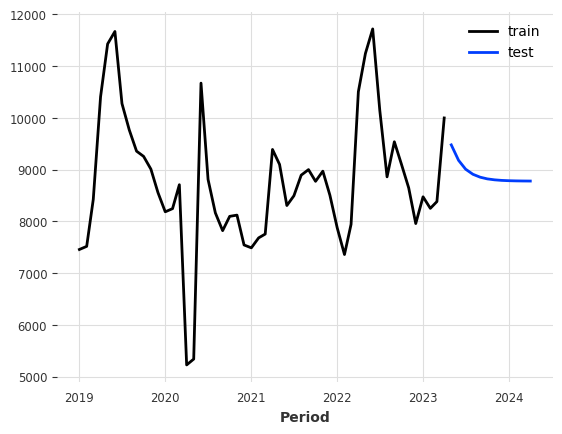

In [89]:
# comparing predictions with test data
train_data_top.plot(label='train')
ar1_predictions.plot(label='test')

* AR is not suitable for this data

### 2.1.1.5 AR13 model

In [90]:
# initializing model
ar13_model = ar.ARIMA(p=13, d=0,q=0)

In [91]:
#fitting
ar13_model.fit(train_data_top)

ARIMA(p=13, d=0, q=0, seasonal_order=(0, 0, 0, 0), trend=None, random_state=None, add_encoders=None)

In [93]:
# predict
ar13_predictions = ar1_model.predict(n=12,series=train_data_top)
ar13_predictions

<TimeSeries (DataArray) (Period: 12, component: 1, sample: 1)> Size: 96B
array([[[9475.94254226]],

       [[9177.49706219]],

       [[9006.23205599]],

       [[8907.95044576]],

       [[8851.55086288]],

       [[8819.18557154]],

       [[8800.6125249 ]],

       [[8789.95425342]],

       [[8783.8379305 ]],

       [[8780.32803622]],

       [[8778.31385907]],

       [[8777.15800956]]])
Coordinates:
  * Period     (Period) datetime64[ns] 96B 2023-05-01 2023-06-01 ... 2024-04-01
  * component  (component) object 8B 'Units'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [94]:
# evaluation metrics for hwes_model

ar13_metric = {
    'MAE': mae,
    'MAPE': mape,
    'MSE': mse,
    'RMSE': rmse
}

# storing results in a null dictiniary
ar13_metric_results = {}

# using for loop for each metric
for metric_name, metric_function in ar13_metric.items():
    ar13_metric_results[metric_name] = metric_function(test_data_top, ar13_predictions)

# converting dict to dataframe
ar13_metrics = pd.DataFrame([ar13_metric_results])

In [95]:
ar13_metrics['Model']='AR(13)'
ar13_metrics

,MAE,MAPE,MSE,RMSE,Model
0,1233.951208,11.581319,2.270496e+06,1506.816502,AR(13)


<Axes: xlabel='Period'>

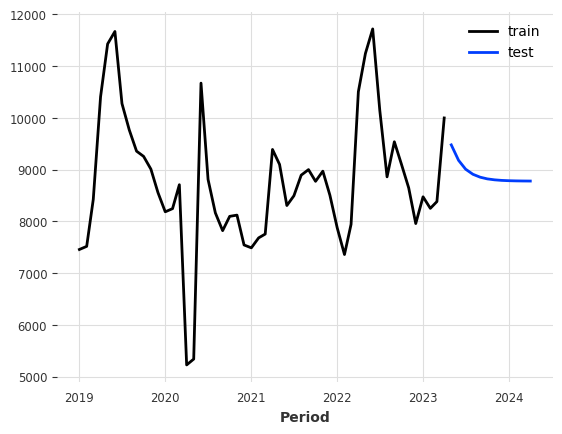

In [96]:
train_data_top.plot(label='train')
ar13_predictions.plot(label='test')

* AR13 is also not good model
* why AR is not good???

### 2.1.1.6 MA model

In [134]:
# initializing model
ma1_model = ar.ARIMA(p=0, d=0, q=1)

In [135]:
#fitting data
ma1_model.fit(train_data_top)

ARIMA(p=0, d=0, q=1, seasonal_order=(0, 0, 0, 0), trend=None, random_state=None, add_encoders=None)

In [136]:
ma1_model

ARIMA(p=0, d=0, q=1, seasonal_order=(0, 0, 0, 0), trend=None, random_state=None, add_encoders=None)

In [137]:
# predicting
ma1_predictions = ma1_model.predict(len(test_data_top))

In [138]:
ma1_predictions

<TimeSeries (DataArray) (Period: 13, component: 1, sample: 1)> Size: 104B
array([[[9591.87900577]],

       [[8776.12506479]],

       [[8776.12506479]],

       [[8776.12506479]],

       [[8776.12506479]],

       [[8776.12506479]],

       [[8776.12506479]],

       [[8776.12506479]],

       [[8776.12506479]],

       [[8776.12506479]],

       [[8776.12506479]],

       [[8776.12506479]],

       [[8776.12506479]]])
Coordinates:
  * Period     (Period) datetime64[ns] 104B 2023-05-01 2023-06-01 ... 2024-05-01
  * component  (component) object 8B 'Units'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [139]:
# evaluation metrics for hwes_model

ma1_metric = {
    'MAE': mae,
    'MAPE': mape,
    'MSE': mse,
    'RMSE': rmse
}

# storing results in a null dictiniary
ma1_metric_results = {}

# using for loop for each metric
for metric_name, metric_function in ma1_metric.items():
    ma1_metric_results[metric_name] = metric_function(test_data_top, ma1_predictions)

# converting dict to dataframe
ma1_metrics = pd.DataFrame([ma1_metric_results])

In [140]:
ma1_metrics['Model']='MA(1)'
ma1_metrics

,MAE,MAPE,MSE,RMSE,Model
0,1450.853239,13.315823,3.228469e+06,1796.794165,MA(1)


<Axes: xlabel='Period'>

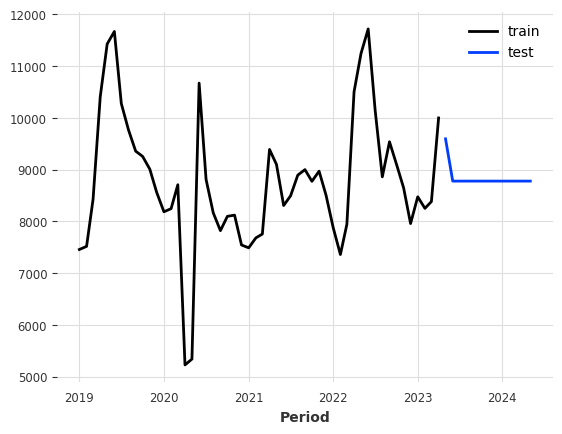

In [141]:
train_data_top.plot(label='train')
ma1_predictions.plot(label='test')

#### MA13 model

In [120]:
ma13_model = ar.ARIMA(p=0, d=0,q=13)

In [121]:
#fitting data
ma13_model.fit(train_data_top)

d:\G_RAJESH\UOH_MBA\projects2.0\p2.0venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\G_RAJESH\UOH_MBA\projects2.0\p2.0venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(p=0, d=0, q=13, seasonal_order=(0, 0, 0, 0), trend=None, random_state=None, add_encoders=None)

In [122]:
# predicting
ma13_predictions = ma13_model.predict(len(test_data_top))

In [123]:
ma13_predictions

<TimeSeries (DataArray) (Period: 13, component: 1, sample: 1)> Size: 104B
array([[[9428.99227147]],

       [[8799.76815201]],

       [[8953.19936732]],

       [[8903.93144281]],

       [[8726.99388609]],

       [[8481.59007665]],

       [[8598.0192596 ]],

       [[8445.59637776]],

       [[8342.29062398]],

       [[8497.90386792]],

       [[8443.33543225]],

       [[8386.76162216]],

       [[8526.88386218]]])
Coordinates:
  * Period     (Period) datetime64[ns] 104B 2023-05-01 2023-06-01 ... 2024-05-01
  * component  (component) object 8B 'Units'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [128]:
# evaluation metrics for hwes_model

ma13_metrics = {
    'MAE': mae,
    'MAPE': mape,
    'MSE': mse,
    'RMSE': rmse
}

# storing results in a null dictiniary
ma13_metric_results = {}

# using for loop for each metric
for metric_name, metric_function in ma13_metrics.items():
    ma13_metric_results[metric_name] = metric_function(test_data_top, ma13_predictions)

# converting dict to dataframe
ma13_metrics = pd.DataFrame([ma13_metric_results])

In [129]:
ma13_metrics['Model']='MA(13)'
ma13_metrics

,MAE,MAPE,MSE,RMSE,Model
0,1566.425905,14.414415,3.609388e+06,1899.838979,MA(13)


<Axes: xlabel='Period'>

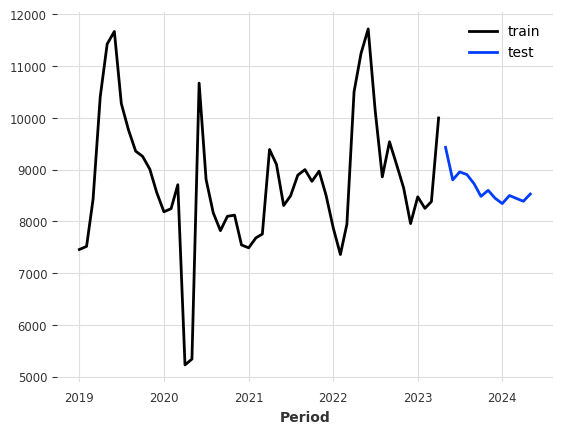

In [130]:
train_data_top.plot(label='train')
ma13_predictions.plot(label='test')

* no improvement from MA(1)

### 2.1.1.7 ARIMA model

In [97]:
# initiating ARIMA model
arima_model = ar.ARIMA(p=1, d=0, q=1,
                    seasonal_order = (1,0,1,12))

In [98]:
# fitting data
arima_model.fit(train_data_top)

ARIMA(p=1, d=0, q=1, seasonal_order=(1, 0, 1, 12), trend=None, random_state=None, add_encoders=None)

In [99]:
# predictions
arima_predictions = arima_model.predict(len(test_data_top))
arima_predictions

<TimeSeries (DataArray) (Period: 13, component: 1, sample: 1)> Size: 104B
array([[[9847.2699013 ]],

       [[9529.42906294]],

       [[9021.47632227]],

       [[8829.77020462]],

       [[8830.37379011]],

       [[8787.68126258]],

       [[8740.41520104]],

       [[8514.89120773]],

       [[8430.24003732]],

       [[8396.2277526 ]],

       [[8566.45333874]],

       [[8908.19307215]],

       [[9021.16777528]]])
Coordinates:
  * Period     (Period) datetime64[ns] 104B 2023-05-01 2023-06-01 ... 2024-05-01
  * component  (component) object 8B 'Units'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [101]:
# evaluation metrics for hwes_model

arima_metric = {
    'MAE': mae,
    'MAPE': mape,
    'MSE': mse,
    'RMSE': rmse
}

# storing results in a null dictiniary
arima_metric_results = {}

# using for loop for each metric
for metric_name, metric_function in arima_metric.items():
    arima_metric_results[metric_name] = metric_function(test_data_top, arima_predictions)

# converting dict to dataframe
arima_metrics = pd.DataFrame([arima_metric_results])

In [102]:
arima_metrics['Model']='ARIMA(1,0,1)'
arima_metrics

,MAE,MAPE,MSE,RMSE,Model
0,1357.777915,12.565919,2.629122e+06,1621.456791,"ARIMA(1,0,1)"


<Axes: xlabel='Period'>

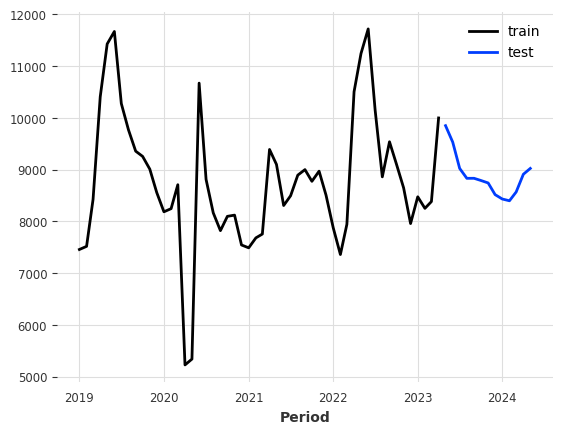

In [103]:
train_data_top.plot(label='train')
arima_predictions.plot(label='test')

### 2.1.1.8 ARIMA gridsearch

In [104]:
arima_gs = ar.ARIMA()

In [105]:
arima_gs.gridsearch(parameters={
    'p':np.arange(13),
    'd':np.arange(3),
    'q':np.arange(10)
},
series = train_data_top,
val_series = test_data_top,
metric = mape
)

d:\G_RAJESH\UOH_MBA\projects2.0\p2.0venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\G_RAJESH\UOH_MBA\projects2.0\p2.0venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\G_RAJESH\UOH_MBA\projects2.0\p2.0venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\G_RAJESH\UOH_MBA\projects2.0\p2.0venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\G_RAJESH\UOH_MBA\project

(ARIMA(p=9, d=2, q=7, seasonal_order=(0, 0, 0, 0), trend=None, random_state=None, add_encoders=None),
 {'p': 9, 'd': 2, 'q': 7},
 5.706786197492656)

#### ARIMA(9,2,7)

In [107]:
# initiating model
arima1224_model = ar.ARIMA(p=9,d=2,q=7)

In [108]:
# fitting data
arima1224_model.fit(train_data_top)

d:\G_RAJESH\UOH_MBA\projects2.0\p2.0venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(p=9, d=2, q=7, seasonal_order=(0, 0, 0, 0), trend=None, random_state=None, add_encoders=None)

In [109]:
# predictions
arima1224_predictions = arima1224_model.predict(len(test_data_top))
arima1224_predictions

<TimeSeries (DataArray) (Period: 13, component: 1, sample: 1)> Size: 104B
array([[[ 9988.57315528]],

       [[10710.66957657]],

       [[10803.57600514]],

       [[ 9866.54063207]],

       [[ 9855.47320341]],

       [[ 9607.79590007]],

       [[ 9985.02385368]],

       [[ 9209.1233187 ]],

       [[ 8855.67110609]],

       [[ 9878.18282969]],

       [[10296.8461087 ]],

       [[10966.58035178]],

       [[10497.57820108]]])
Coordinates:
  * Period     (Period) datetime64[ns] 104B 2023-05-01 2023-06-01 ... 2024-05-01
  * component  (component) object 8B 'Units'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [111]:
# evaluation metrics for hwes_model

arima1224_metric = {
    'MAE': mae,
    'MAPE': mape,
    'MSE': mse,
    'RMSE': rmse
}

# storing results in a null dictiniary
arima1224_metric_results = {}

# using for loop for each metric
for metric_name, metric_function in arima1224_metric.items():
    arima1224_metric_results[metric_name] = metric_function(test_data_top, arima1224_predictions)

# converting dict to dataframe
arima1224_metrics = pd.DataFrame([arima1224_metric_results])

In [113]:
arima1224_metrics['Model']='ARIMA(12,2,4)'
arima1224_metrics

,MAE,MAPE,MSE,RMSE,Model
0,597.018842,5.706786,607348.667273,779.325777,"ARIMA(12,2,4)"


<Axes: xlabel='Period'>

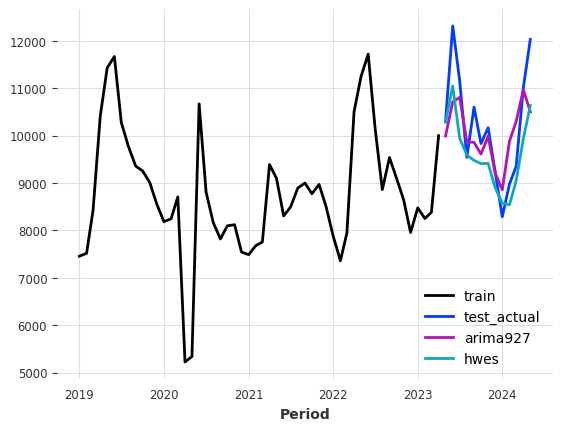

In [115]:
train_data_top.plot(label='train')
test_data_top.plot(label='test_actual')
arima1224_predictions.plot(label='arima927')
hwes_prediction_m.plot(label='hwes')

### 2.1.2 evaluating sem and hwes models


In [142]:
pd.concat([sme_metrics,hwes_metrics,hwes_metrics_m,hwes_metrics_am,hwes_metrics_ma,
           ar1_metrics,ar13_metrics,ma1_metrics,ma13_metrics , arima_metrics ],axis=0)

,MAE,MAPE,MSE,RMSE,Model
0,963.016839,9.143631,1.449390e+06,1203.906164,NaN
0,593.395737,5.483265,6.145901e+05,783.957976,hwes
0,668.254128,6.217082,6.667376e+05,816.539987,hwes_m
0,816.398779,7.531356,1.119567e+06,1058.095729,hwes_am
0,651.801154,6.011480,7.538169e+05,868.226306,hwes_ma
0,1233.951208,11.581319,2.270496e+06,1506.816502,AR(1)
0,1233.951208,11.581319,2.270496e+06,1506.816502,AR(13)
0,1450.853239,13.315823,3.228469e+06,1796.794165,MA(1)
0,1566.425905,14.414415,3.609388e+06,1899.838979,MA(13)
0,1357.777915,12.565919,2.629122e+06,1621.456791,"ARIMA(1,0,1)"


In [147]:
pd.concat([test_data_top.pd_dataframe(),
                sem_prediction.pd_dataframe(),
                hwes_prediction.pd_dataframe(),
                hwes_prediction_m.pd_dataframe(),
                hwes_prediction_am.pd_dataframe(),
                hwes_prediction_ma.pd_dataframe(),
                ar1_predictions.pd_dataframe(),
                ar13_predictions.pd_dataframe(),
                ma1_predictions.pd_dataframe(),
                ma13_predictions.pd_dataframe() ,
                 arima_predictions.pd_dataframe()],
                    axis=1)

component,Units,Units,Units,Units,Units,Units,Units,Units,Units,Units,Units
Period,,,,,,,,,,,
2023-05-01,10299.615404,9828.117626,9906.292172,10279.279953,9252.931210,9732.789640,9475.942542,9475.942542,9591.879006,9428.992271,9847.269901
2023-06-01,12310.753813,9828.117626,11306.533172,11045.977735,11249.528958,11293.082263,9177.497062,9177.497062,8776.125065,8799.768152,9529.429063
2023-07-01,11154.540160,9828.117626,10253.185017,9940.339054,10058.661366,10220.108939,9006.232056,9006.232056,8776.125065,8953.199367,9021.476322
2023-08-01,9537.688131,9828.117626,9847.184489,9588.345262,9799.496452,9903.683086,8907.950446,8907.950446,8776.125065,8903.931443,8829.770205
2023-09-01,10596.464312,9828.117626,9887.533122,9474.984315,9599.675957,9811.879895,8851.550863,8851.550863,8776.125065,8726.993886,8830.373790
2023-10-01,9830.716127,9828.117626,9824.292271,9406.262095,9606.342990,9783.806764,8819.185572,8819.185572,8776.125065,8481.590077,8787.681263
2023-11-01,10165.668606,9828.117626,9761.821233,9413.627204,9604.690352,9759.249536,8800.612525,8800.612525,8776.125065,8598.019260,8740.415201
2023-12-01,9242.413022,9828.117626,9231.646089,8903.289902,9076.606795,9258.232459,8789.954253,8789.954253,8776.125065,8445.596378,8514.891208
2024-01-01,8285.465486,9828.117626,8892.396726,8571.594920,8725.228970,8910.314890,8783.837930,8783.837930,8776.125065,8342.290624,8430.240037


* why three models prediction is same?
* it was same because, you have used same model(coding mistake)

* check backtesting also....

<Axes: xlabel='Period'>

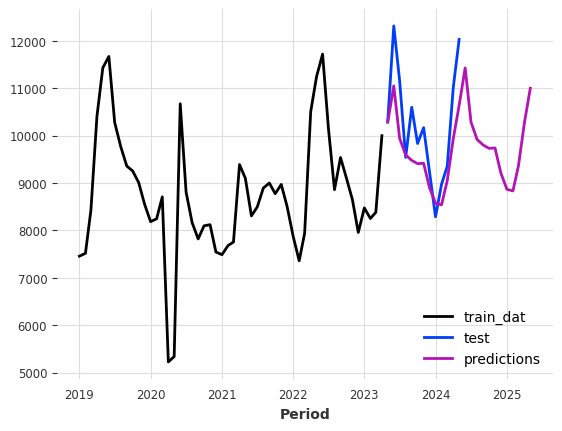

In [149]:
train_data_top.plot(label='train_dat')
test_data_top.plot(label='test')
# hwes_prediction.plot(label='hwes')
# hwes_prediction_m.plot(label='hwes_m')
hwes_model_m.predict(len(test_data_top)+12).plot(label='predictions')

<Axes: xlabel='Period'>

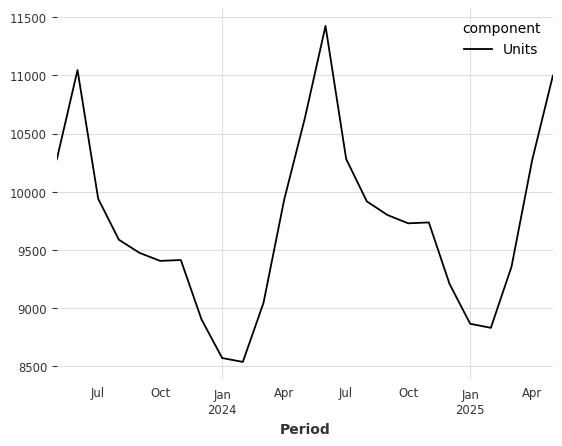

In [150]:
hwes_model_m.predict(len(test_data_top)+12).pd_dataframe().plot()

In [151]:
# calculatin AIC

len(hwes_model.model_params)

6

# deploying

* which one to deploy(trained model validated with test data or fully trained model)?

In [160]:
# initializing best model 
hwes_best = ExponentialSmoothing(trend= ModelMode.ADDITIVE ,
                                    seasonal=SeasonalityMode.ADDITIVE)

In [161]:
# fitting
hwes_best.fit(data_at_top_ds)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0, kwargs=None)

In [167]:
#predicting for next 3 months
hwes_best_pred_3 = hwes_best.predict(3).pd_dataframe()
hwes_best_pred_3

component,Units
Period,
2024-06-01,13168.325625
2024-07-01,12064.702588
2024-08-01,11403.141299


In [168]:
#predicting for next 6 months
hwes_best_pred_6 = hwes_best.predict(6).pd_dataframe()
hwes_best_pred_6

component,Units
Period,
2024-06-01,13168.325625
2024-07-01,12064.702588
2024-08-01,11403.141299
2024-09-01,11696.798604
2024-10-01,11511.537271
2024-11-01,11532.629634


In [169]:
#predicting for next 9 months
hwes_best_pred_9 = hwes_best.predict(9).pd_dataframe()
hwes_best_pred_9

component,Units
Period,
2024-06-01,13168.325625
2024-07-01,12064.702588
2024-08-01,11403.141299
2024-09-01,11696.798604
2024-10-01,11511.537271
2024-11-01,11532.629634
2024-12-01,10935.629573
2025-01-01,10584.004000
2025-02-01,10684.193329


In [165]:
#predicting for next 12 months
hwes_best_pred_12 = hwes_best.predict(12).pd_dataframe()
hwes_best_pred_12

component,Units
Period,
2024-06-01,13168.325625
2024-07-01,12064.702588
2024-08-01,11403.141299
2024-09-01,11696.798604
2024-10-01,11511.537271
2024-11-01,11532.629634
2024-12-01,10935.629573
2025-01-01,10584.004000
2025-02-01,10684.193329


#### exporting model

In [170]:
hwes_best.save('hwes_best.pkl')

### loading saved model

In [171]:
from darts.models import ExponentialSmoothing
model = ExponentialSmoothing.load('hwes_best.pkl')

In [178]:
pred = model.predict(12).pd_dataframe()

In [179]:
pred == hwes_best_pred_12

component,Units
Period,
2024-06-01,True
2024-07-01,True
2024-08-01,True
2024-09-01,True
2024-10-01,True
2024-11-01,True
2024-12-01,True
2025-01-01,True
2025-02-01,True


# 2.2 Building model at Circle level